In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [48]:
def color():
    return (randint(0,255), randint(0,255), randint(0,255))

In [53]:
img = cv2.imread('th1.jpg',0)
edges = cv2.Canny(img,100,200)

In [54]:
cv2.imwrite('edges.jpg', edges)

True

In [51]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

In [52]:
cv2.imwrite('th1.jpg', th1)

True

In [7]:
# getting mask with connectComponents
ret, labels = cv2.connectedComponents(th1)
for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 255

In [8]:
cv2.imwrite('mask.jpg', mask)

True

In [9]:
len(mask)

3378

In [10]:
if labels[1006].all()==labels[100].all():
    print(True)

True


In [11]:
labels

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int32)

In [12]:
mat = np.asarray(labels)

In [11]:
arr = np.zeros((3378, 5200))

In [133]:
for i in range(0,1):
    b = np.where(mat == i)
    if len(b[0])==0 or len(b[1])==0 or len(b[0])!=len(b[1]):
        continue
    c = 255
    for j in range(len(b[1])):
        arr[b[0][j]][b[1][j]] = c
    print(i)
    print(c)

0
255


In [37]:
np.where(mat == 9)

(array([1067, 1067, 1068, 1068, 1069, 1069, 1070, 1070, 1071, 1071],
       dtype=int64),
 array([3667, 3668, 3667, 3668, 3667, 3668, 3667, 3668, 3667, 3668],
       dtype=int64))

In [39]:
mat[1067][3668]

9

In [74]:
img[0][0]= 180

In [134]:
cv2.imwrite('new_img.jpg', arr)

True

In [77]:
img

array([[124, 124, 124, ...,  47,  47,  47],
       [124, 124, 124, ...,  47,  47,  47],
       [124, 124, 124, ...,  47,  47,  47],
       ...,
       [124, 124, 124, ...,  47,  47,  47],
       [124, 124, 124, ...,  47,  47,  47],
       [124, 124, 124, ...,  47,  47,  47]], dtype=uint8)

In [99]:
b = np.where(mat == 9)

In [100]:
ans = []
for i in range(len(b[0])):
    ans.append((b[0][i], b[1][i]))

In [101]:
import math

TOLERANCE = 10e-6
EPSILON = 10e-12


class Point:
    __slots__ = ['x', 'y']

    def __init__(self, x, y=None):
        if y is None:
            self.x, self.y = x[0], x[1]
        else:
            self.x, self.y = x, y

    def __repr__(self):
        return 'Point(%r, %r)' % (self.x, self.y)

    def __str__(self):
        return '%G,%G' % (self.x, self.y)

    def __complex__(self):
        return complex(self.x, self.y)

    def __hash__(self):
        return hash(self.__complex__())

    def __bool__(self):
        return bool(self.x or self.y)

    def __add__(self, other):
        if isinstance(other, Point):
            return Point(self.x + other.x, self.y + other.y)
        else:
            return Point(self.x + other, self.y + other)

    def __sub__(self, other):
        if isinstance(other, Point):
            return Point(self.x - other.x, self.y - other.y)
        else:
            return Point(self.x - other, self.y - other)

    def __mul__(self, other):
        if isinstance(other, Point):
            return Point(self.x * other.x, self.y * other.y)
        else:
            return Point(self.x * other, self.y * other)

    def __truediv__(self, other):
        if isinstance(other, Point):
            return Point(self.x / other.x, self.y / other.y)
        else:
            return Point(self.x / other, self.y / other)

    def __neg__(self):
        return Point(-self.x, -self.y)

    def __len__(self):
        return math.hypot(self.x, self.y)

    def __eq__(self, other):
        try:
            return self.x == other.x and self.y == other.y
        except Exception:
            return False

    def __ne__(self, other):
        try:
            return self.x != other.x or self.y != other.y
        except Exception:
            return True

    add = __add__
    subtract = __sub__
    multiply = __mul__
    divide = __truediv__
    negate = __neg__
    getLength = __len__
    equals = __eq__

    def copy(self):
        return Point(self.x, self.y)

    def dot(self, other):
        return self.x * other.x + self.y * other.y

    def normalize(self, length=1):
        current = self.__len__()
        scale = length / current if current != 0 else 0
        return Point(self.x * scale, self.y * scale)

    def getDistance(self, other):
        return math.hypot(self.x - other.x, self.y - other.y)


class Segment:

    def __init__(self, *args):
        self.point = Point(0, 0)
        self.handleIn = Point(0, 0)
        self.handleOut = Point(0, 0)
        if len(args) == 1:
            if isinstance(args[0], Segment):
                self.point = args[0].point
                self.handleIn = args[0].handleIn
                self.handleOut = args[0].handleOut
            else:
                self.point = args[0]
        elif len(args) == 2 and isinstance(args[0], (int, float)):
            self.point = Point(*args)
        elif len(args) == 2:
            self.point = args[0]
            self.handleIn = args[1]
        elif len(args) == 3:
            self.point = args[0]
            self.handleIn = args[1]
            self.handleOut = args[2]
        else:
            self.point = Point(args[0], args[1])
            self.handleIn = Point(args[2], args[3])
            self.handleOut = Point(args[4], args[5])

    def __repr__(self):
        return 'Segment(%r, %r, %r)' % (self.point, self.handleIn, self.handleOut)

    def __hash__(self):
        return hash((self.point, self.handleIn, self.handleOut))

    def __bool__(self):
        return bool(self.point or self.handleIn or self.handleOut)

    def getPoint(self):
        return self.point

    def setPoint(self, other):
        self.point = other

    def getHandleIn(self):
        return self.handleIn

    def setHandleIn(self, other):
        self.handleIn = other

    def getHandleOut(self):
        return self.handleOut

    def setHandleOut(self, other):
        self.handleOut = other


class PathFitter:

    def __init__(self, segments, error=2.5):
        self.points = []
        # Copy over points from path and filter out adjacent duplicates.
        l = len(segments)
        prev = None
        for i in range(l):
            point = segments[i].point.copy()
            if prev != point:
                self.points.append(point)
                prev = point
        self.error = error

    def fit(self):
        points = self.points
        length = len(points)
        self.segments = [Segment(points[0])] if length > 0 else []
        if length > 1:
            self.fitCubic(0, length - 1,
                          # Left Tangent
                          points[1].subtract(points[0]).normalize(),
                          # Right Tangent
                          points[length - 2].subtract(points[length - 1]).normalize())
        return self.segments

    # Fit a Bezier curve to a (sub)set of digitized points
    def fitCubic(self, first, last, tan1, tan2):
        #  Use heuristic if region only has two points in it
        if last - first == 1:
            pt1 = self.points[first]
            pt2 = self.points[last]
            dist = pt1.getDistance(pt2) / 3
            self.addCurve([pt1, pt1 + tan1.normalize(dist),
                           pt2 + tan2.normalize(dist), pt2])
            return
        # Parameterize points, and attempt to fit curve
        uPrime = self.chordLengthParameterize(first, last)
        maxError = max(self.error, self.error * self.error)
        # Try 4 iterations
        for i in range(5):
            curve = self.generateBezier(first, last, uPrime, tan1, tan2)
            #  Find max deviation of points to fitted curve
            maxerr, maxind = self.findMaxError(first, last, curve, uPrime)
            if maxerr < self.error:
                self.addCurve(curve)
                return
            split = maxind
            # If error not too large, try reparameterization and iteration
            if maxerr >= maxError:
                break
            self.reparameterize(first, last, uPrime, curve)
            maxError = maxerr
        # Fitting failed -- split at max error point and fit recursively
        V1 = self.points[split - 1].subtract(self.points[split])
        V2 = self.points[split] - self.points[split + 1]
        tanCenter = V1.add(V2).divide(2).normalize()
        self.fitCubic(first, split, tan1, tanCenter)
        self.fitCubic(split, last, tanCenter.negate(), tan2)

    def addCurve(self, curve):
        prev = self.segments[len(self.segments) - 1]
        prev.setHandleOut(curve[1].subtract(curve[0]))
        self.segments.append(
            Segment(curve[3], curve[2].subtract(curve[3])))

    # Use least-squares method to find Bezier control points for region.
    def generateBezier(self, first, last, uPrime, tan1, tan2):
        epsilon = 1e-11
        pt1 = self.points[first]
        pt2 = self.points[last]
        # Create the C and X matrices
        C = [[0, 0], [0, 0]]
        X = [0, 0]

        l = last - first + 1

        for i in range(l):
            u = uPrime[i]
            t = 1 - u
            b = 3 * u * t
            b0 = t * t * t
            b1 = b * t
            b2 = b * u
            b3 = u * u * u
            a1 = tan1.normalize(b1)
            a2 = tan2.normalize(b2)
            tmp = (self.points[first + i]
                   - pt1.multiply(b0 + b1)
                   - pt2.multiply(b2 + b3))
            C[0][0] += a1.dot(a1)
            C[0][1] += a1.dot(a2)
            # C[1][0] += a1.dot(a2)
            C[1][0] = C[0][1]
            C[1][1] += a2.dot(a2)
            X[0] += a1.dot(tmp)
            X[1] += a2.dot(tmp)

        # Compute the determinants of C and X
        detC0C1 = C[0][0] * C[1][1] - C[1][0] * C[0][1]
        if abs(detC0C1) > epsilon:
            # Kramer's rule
            detC0X = C[0][0] * X[1] - C[1][0] * X[0]
            detXC1 = X[0] * C[1][1] - X[1] * C[0][1]
            # Derive alpha values
            alpha1 = detXC1 / detC0C1
            alpha2 = detC0X / detC0C1
        else:
            # Matrix is under-determined, try assuming alpha1 == alpha2
            c0 = C[0][0] + C[0][1]
            c1 = C[1][0] + C[1][1]
            if abs(c0) > epsilon:
                alpha1 = alpha2 = X[0] / c0
            elif abs(c1) > epsilon:
                alpha1 = alpha2 = X[1] / c1
            else:
                # Handle below
                alpha1 = alpha2 = 0

        # If alpha negative, use the Wu/Barsky heuristic (see text)
        # (if alpha is 0, you get coincident control points that lead to
        # divide by zero in any subsequent NewtonRaphsonRootFind() call.
        segLength = pt2.getDistance(pt1)
        epsilon *= segLength
        if alpha1 < epsilon or alpha2 < epsilon:
            # fall back on standard (probably inaccurate) formula,
            # and subdivide further if needed.
            alpha1 = alpha2 = segLength / 3

        # First and last control points of the Bezier curve are
        # positioned exactly at the first and last data points
        # Control points 1 and 2 are positioned an alpha distance out
        # on the tangent vectors, left and right, respectively
        return [pt1, pt1.add(tan1.normalize(alpha1)),
                pt2.add(tan2.normalize(alpha2)), pt2]

    # Given set of points and their parameterization, try to find
    # a better parameterization.
    def reparameterize(self, first, last, u, curve):
        for i in range(first, last + 1):
            u[i - first] = self.findRoot(curve, self.points[i], u[i - first])

    # Use Newton-Raphson iteration to find better root.
    def findRoot(self, curve, point, u):
        # Generate control vertices for Q'
        curve1 = [
            curve[i + 1].subtract(curve[i]).multiply(3) for i in range(3)]
        # Generate control vertices for Q''
        curve2 = [
            curve1[i + 1].subtract(curve1[i]).multiply(2) for i in range(2)]
        # Compute Q(u), Q'(u) and Q''(u)
        pt = self.evaluate(3, curve, u)
        pt1 = self.evaluate(2, curve1, u)
        pt2 = self.evaluate(1, curve2, u)
        diff = pt - point
        df = pt1.dot(pt1) + diff.dot(pt2)
        # Compute f(u) / f'(u)
        if abs(df) < TOLERANCE:
            return u
        # u = u - f(u) / f'(u)
        return u - diff.dot(pt1) / df

    # Evaluate a bezier curve at a particular parameter value
    def evaluate(self, degree, curve, t):
        # Copy array
        tmp = curve[:]
        # Triangle computation
        for i in range(1, degree + 1):
            for j in range(degree - i + 1):
                tmp[j] = tmp[j].multiply(1 - t) + tmp[j + 1].multiply(t)
        return tmp[0]

    # Assign parameter values to digitized points
    # using relative distances between points.
    def chordLengthParameterize(self, first, last):
        u = {0: 0}
        print(first, last)
        for i in range(first + 1, last + 1):
            u[i - first] = u[i - first - 1] + \
                self.points[i].getDistance(self.points[i - 1])
        m = last - first
        for i in range(1, m + 1):
            u[i] /= u[m]
        return u

    # Find the maximum squared distance of digitized points to fitted curve.
    def findMaxError(self, first, last, curve, u):
        index = math.floor((last - first + 1) / 2)
        maxDist = 0
        for i in range(first + 1, last):
            P = self.evaluate(3, curve, u[i - first])
            v = P.subtract(self.points[i])
            dist = v.x * v.x + v.y * v.y  # squared
            if dist >= maxDist:
                maxDist = dist
                index = i
        return maxDist, index


def fitpath(pointlist, error):
    return PathFitter(list(map(Segment, map(Point, pointlist))), error).fit()


def fitpathsvg(pointlist, error):
    return pathtosvg(PathFitter(list(map(Segment, map(Point, pointlist))), error).fit())


def pathtosvg(path):
    segs = ['M', str(path[0].point)]
    last = path[0]
    for seg in path[1:]:
        segs.append('C')
        segs.append(str(last.point + last.handleOut))
        segs.append(str(seg.point + seg.handleIn))
        segs.append(str(seg.point))
        last = seg
    return ' '.join(segs)


if __name__ == '__main__':
    p = ans
    pf = fitpath(p, 2.5)
    print(pf)
    sp = pathtosvg(pf)
    print(sp)

0 9
[Segment(Point(1067, 3667), Point(0, 0), Point(0.0, 1.6836738496567705)), Segment(Point(1071, 3668), Point(0.0, -1.6836738496563157), Point(0, 0))]
M 1067,3667 C 1067,3668.68 1071,3666.32 1071,3668


In [13]:
d = np.where(mat==0)

In [14]:
import bezier

In [15]:
d = np.asfortranarray(d)

In [16]:
d = d.astype('double')

In [27]:
curve1 = bezier.Curve(d, degree=12)

In [42]:
nodes2 = np.asfortranarray([
...     [1.0, -1.0,  0.0, 0.0],
...     [0.0, 0.0 , 1.0, -1.0],
... ]).astype('double')

In [43]:
curve2 = bezier.Curve.from_nodes(nodes2)

In [ ]:
intersections = curve1.intersect(curve2)

In [28]:
curve1

<Curve (degree=12, dimension=2)>

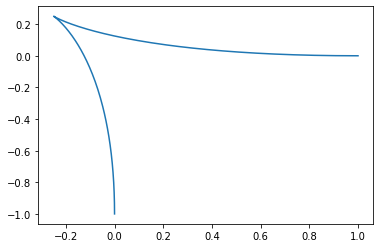

In [45]:
ax = curve2.plot(num_pts=256)

In [46]:
curve2

<Curve (degree=3, dimension=2)>

In [25]:
d.shape

(2, 434891)

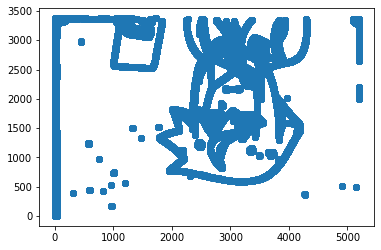

In [32]:
plt.scatter(d[1], d[0])